In [3]:
######### Download packages #########
# ! pip install requests
# ! pip install jsonlines
# ! pip install geopandas

In [18]:
from getdata import GetData

In [17]:
# API 인증키
key = "D9C2C32A-110D-3F33-846F-A831EE3AF020"
# 배경지도 (csv)
background = './data/GSBD_DG_geo.csv'
# 창고 위치 (geojson)
warehouse = './data/Real_99.geojson'
# 경사도 정보 (gpkg)
slope = './data/polygonized.gpkg'

In [19]:
# GetData 인스턴스 생성
data = GetData(key, background, warehouse, slope)

In [20]:
data.warehouse_df

lon        lat
0     127.974419  35.926329
1     127.974419  35.926329
2     127.974419  35.926329
3     127.974419  35.926329
4     127.974419  35.926329
...          ...        ...
3562  129.434048  36.100115
3563  129.434048  36.100115
3564  129.434048  36.100115
3565  128.431608  35.986466
3566  128.431608  35.986466

[3567 rows x 2 columns]

In [21]:
danger = data.get_lon_lat("dng")
restricted = data.get_lon_lat("res")
prohibited = data.get_lon_lat("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


In [22]:
restricted_rev = data.get_lat_lon("res")
danger_rev = data.get_lat_lon("dng")
prh_rev = data.get_lat_lon("prh")

https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISRESC&columns=restricted,res_lbl_1,res_lbl_2,res_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISDNGC&columns=dng_lbl_1,dng_lbl_2,dng_lbl_3,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=
https://api.vworld.kr/req/data?service=data&version=2.0&request=GetFeature&format=json&size=1000&page=1&data=LT_C_AISPRHC&columns=prohibited,prh_lbl_1,prh_lbl_2,prh_lbl_3,prh_lbl_4,prh_typ,ag_geom&geomFilter=BOX(128.1198, 35.6516, 129.5, 37.069)&geometry=true&attribute=true&buffer=10&key=D9C2C32A-110D-3F33-846F-A831EE3AF020&domain=


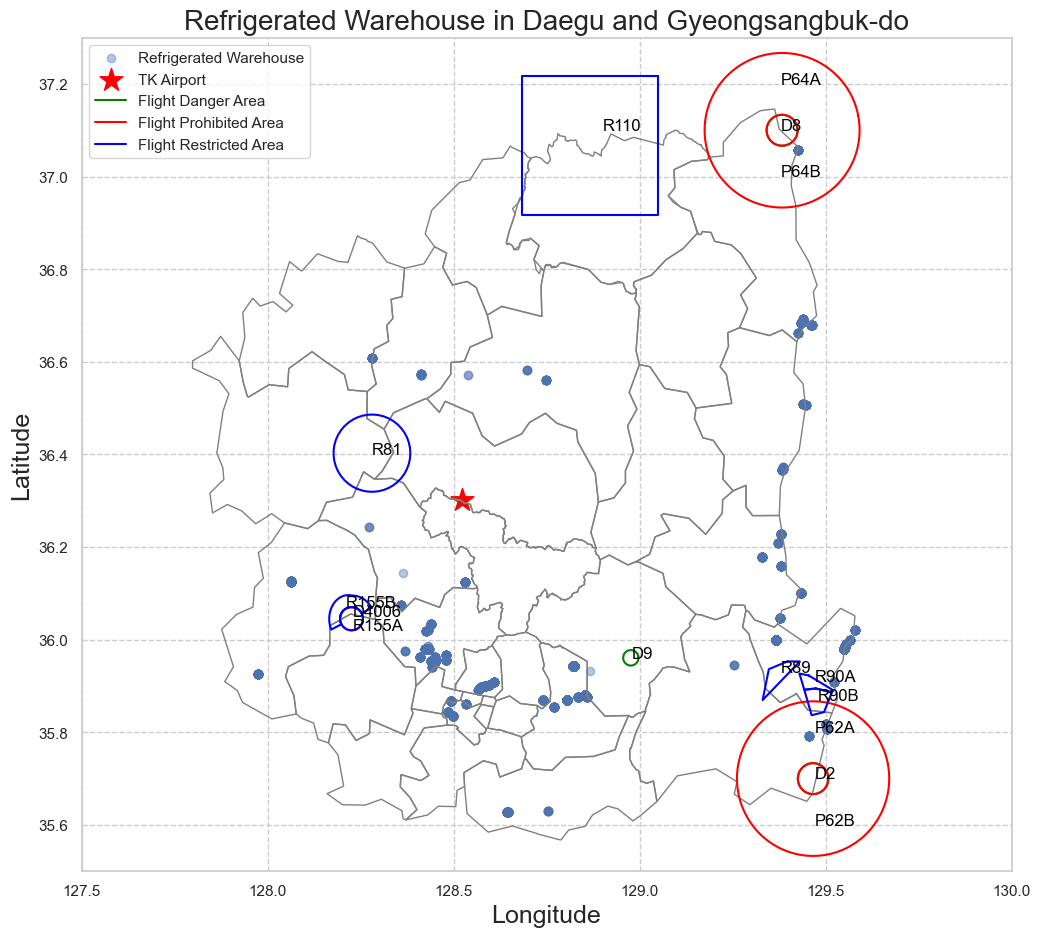

In [48]:
# save = True: 사진 저장
data.plt_visualize(danger, prohibited, restricted, slope = False, save=False)

# **Determination of the optimal K for K-Means algorithm**

## Silhouette Method

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

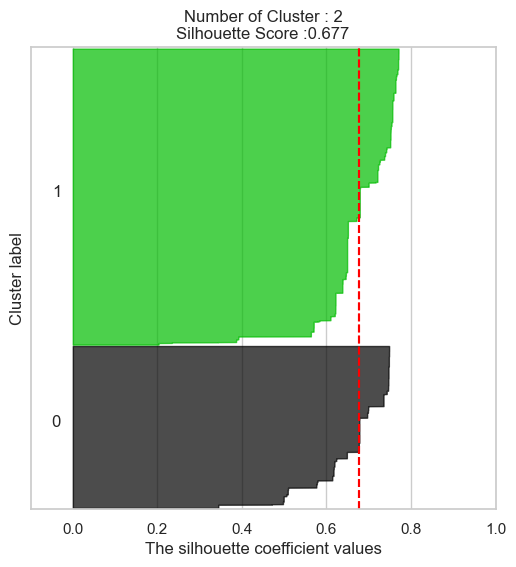

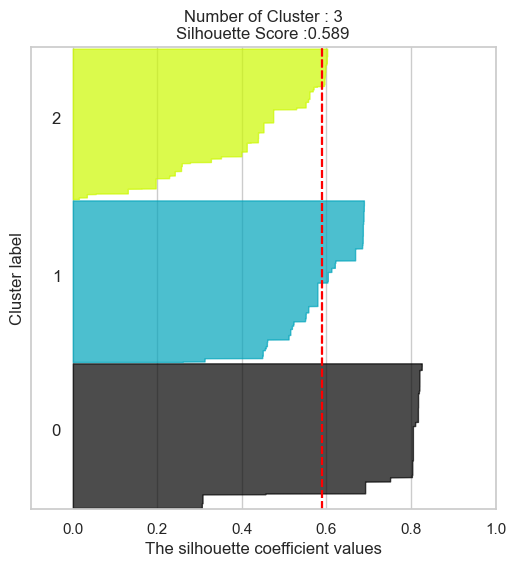

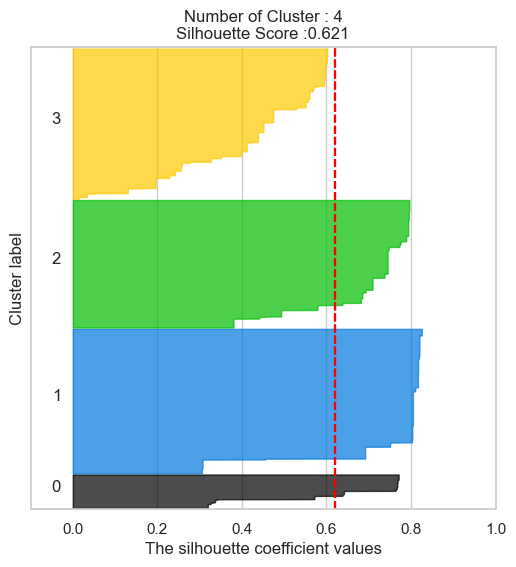

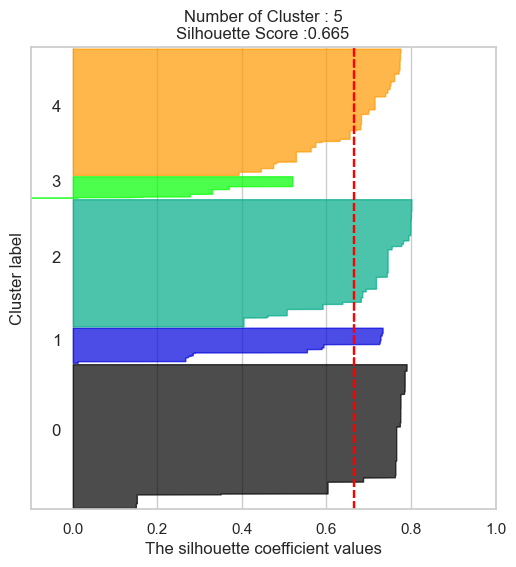

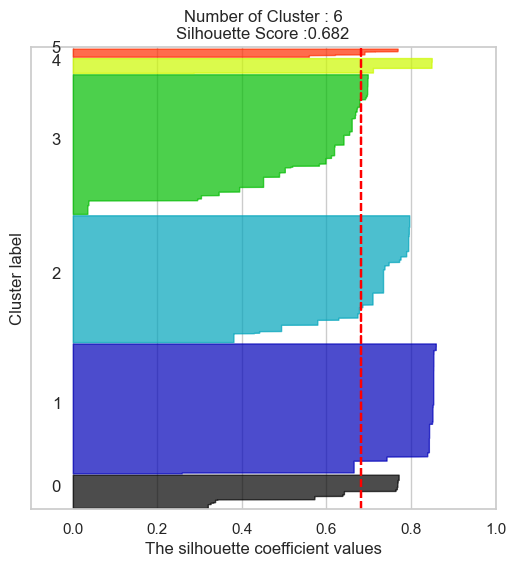

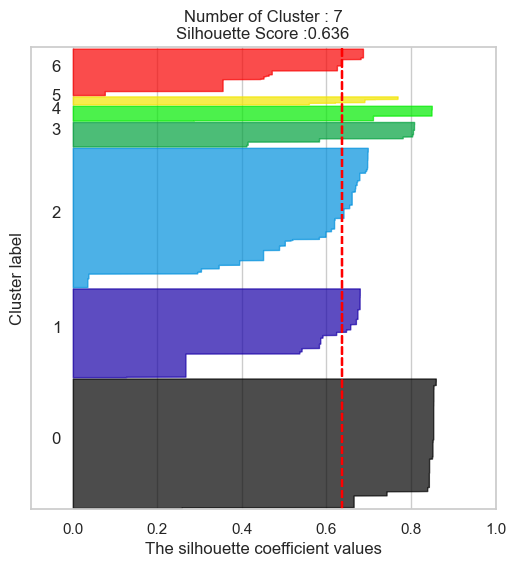

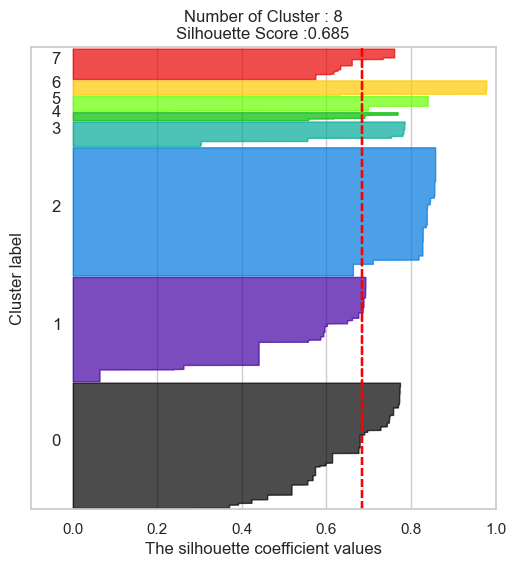

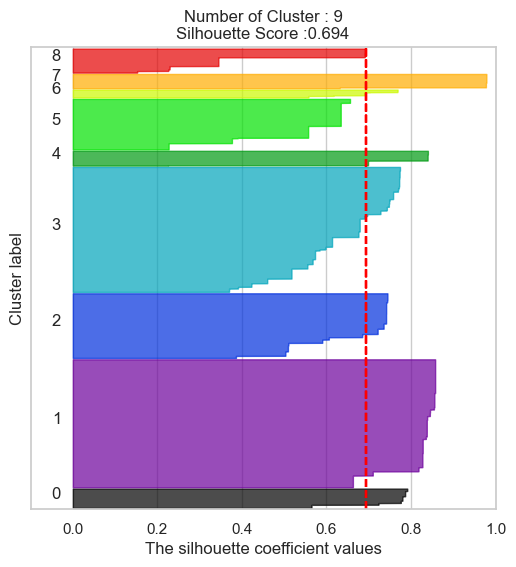

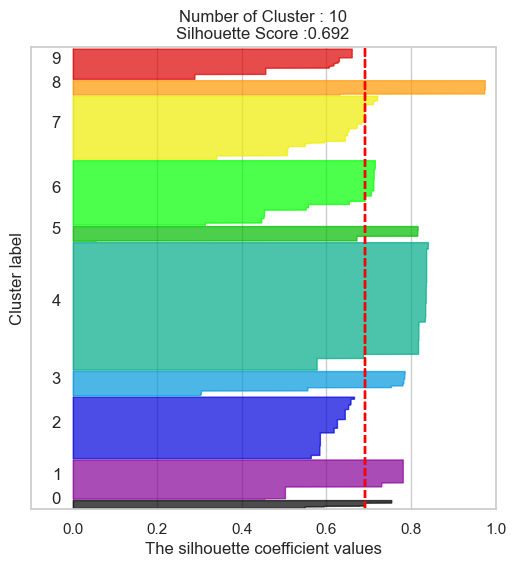

In [37]:
sil_values, sil_avg = data.silhouette(10, separate = True, save = False)

## **Elbow method**

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

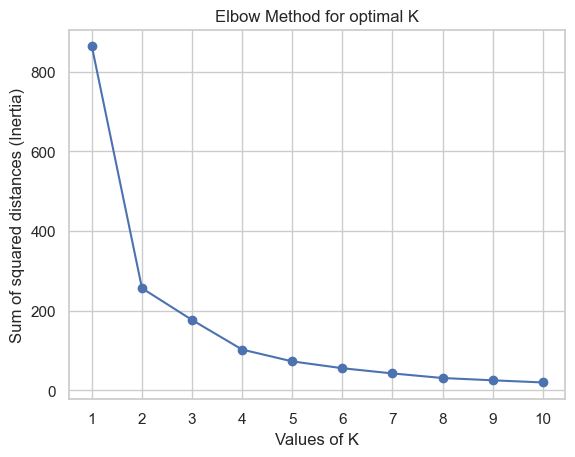

In [26]:
data.elbow(10, save= False)

# **K-means algorithm**

## K = 3

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


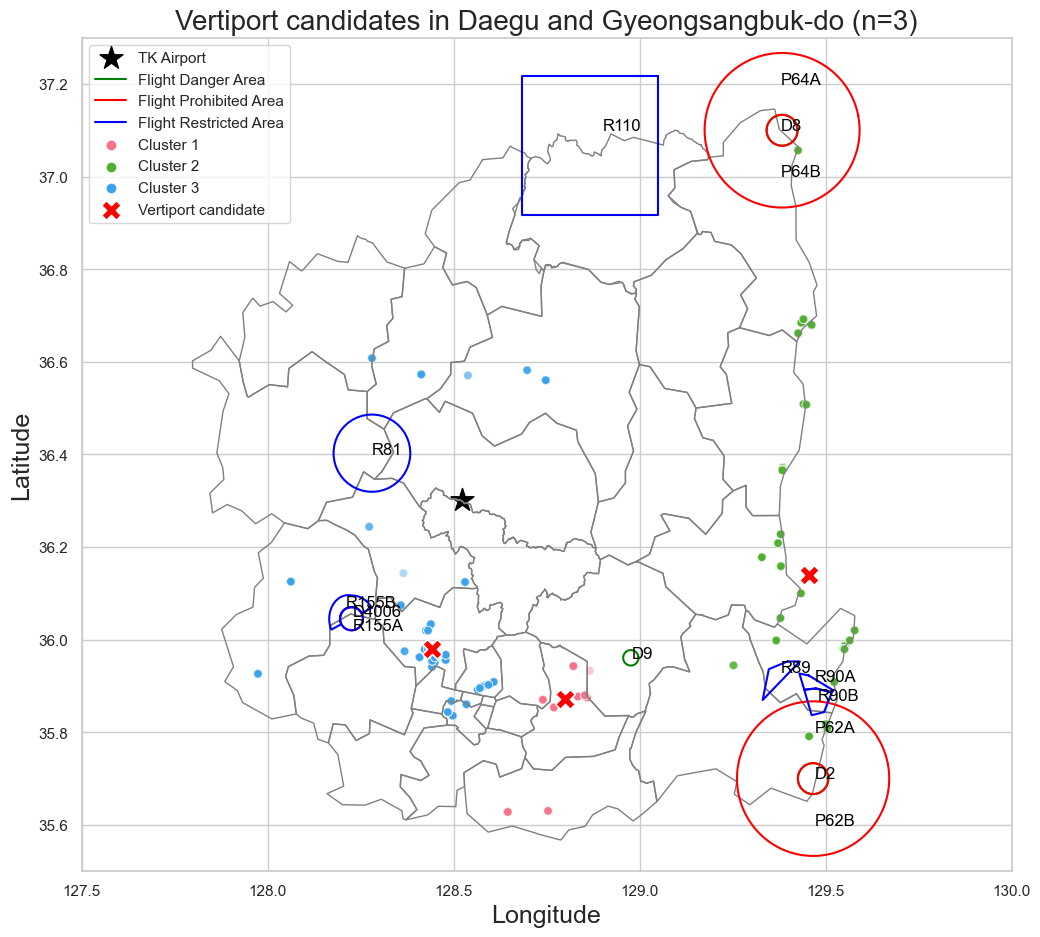

In [38]:
warehouse_df3, centroids_df3 = data.Kmeans(3, danger, prohibited, restricted, slope = False, save=False)

### Adjust the locations

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


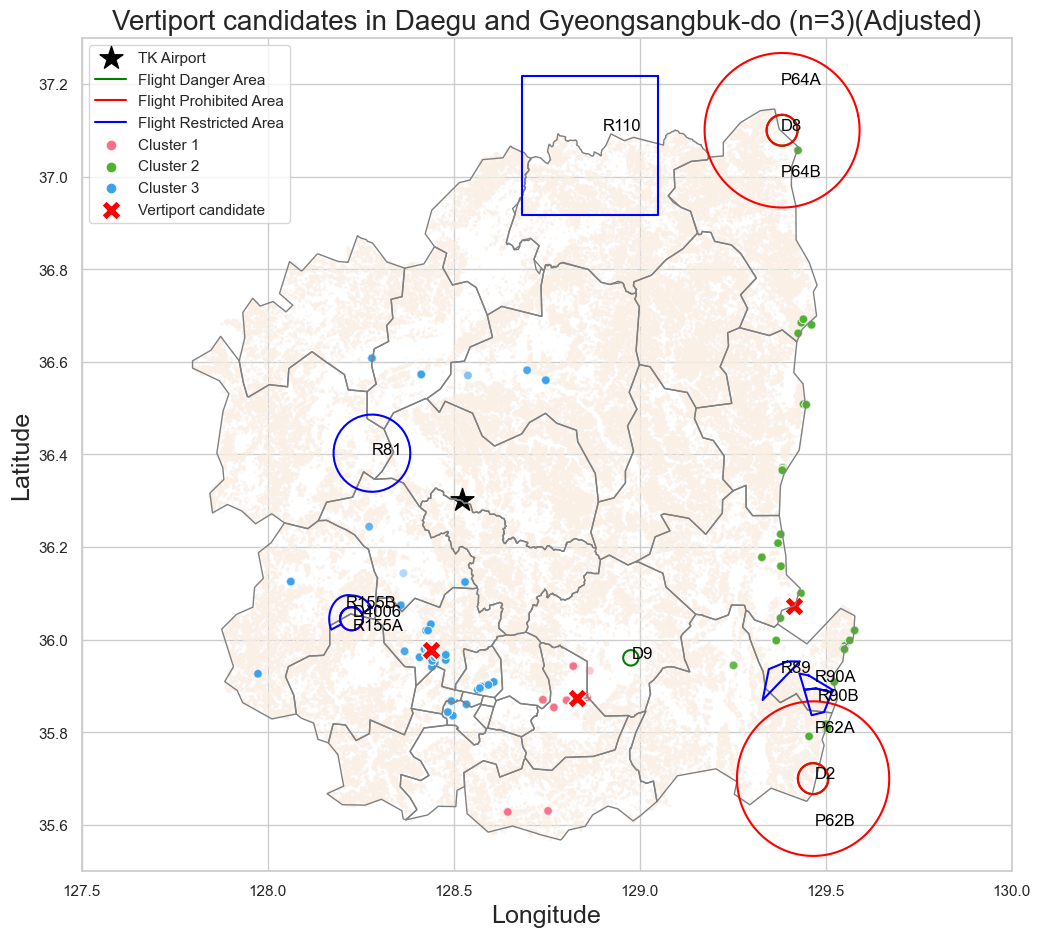

In [43]:
warehouse_df3_ad, centroids_df3_ad = data.Kmeans(3, danger, prohibited, restricted, slope = True, save=False, adjust = True)

In [29]:
data.folium_visualize(centroids_df3_ad, prh_rev, restricted_rev, danger_rev, warehouse=True)

In [30]:
centroids_df3_ad

lon        lat  cluster
0  128.832076  35.874159      0.0
1  129.414746  36.073704      1.0
2  128.439166  35.976866      2.0

## K = 2

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


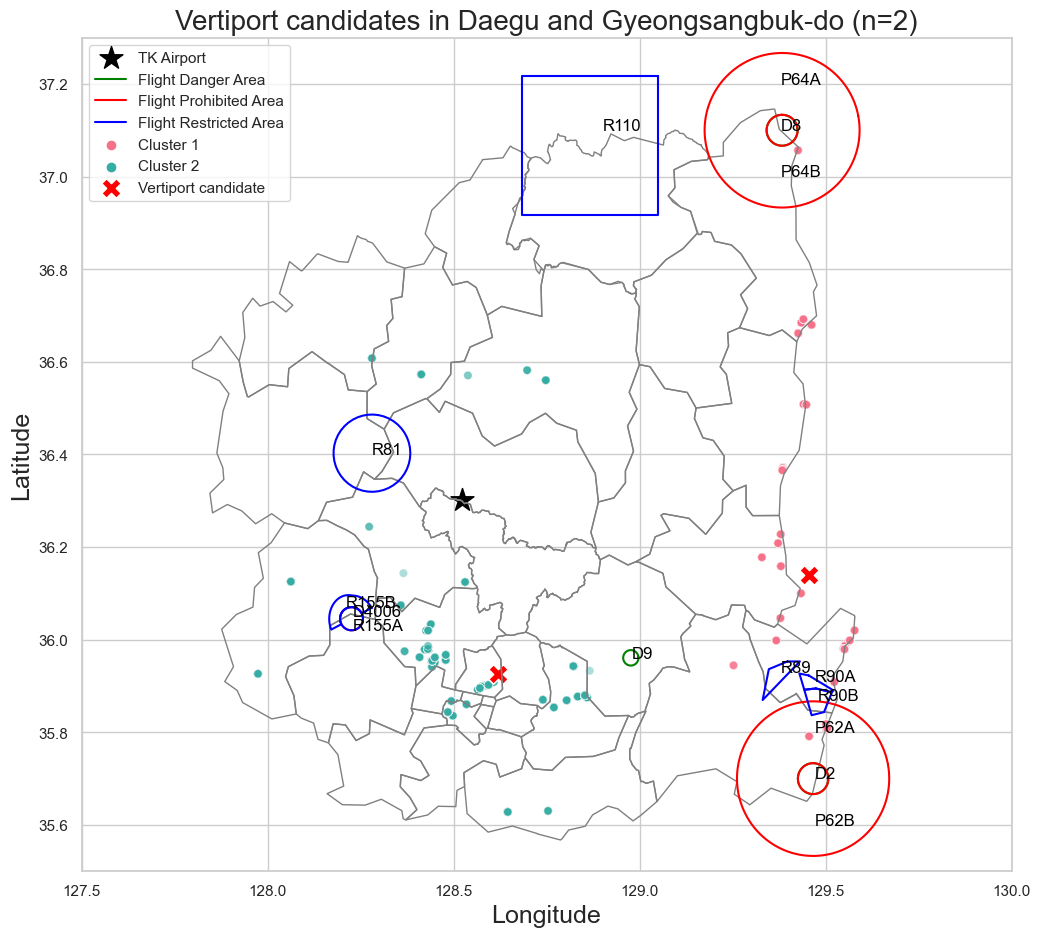

In [44]:
warehouse_df2, centroids_df2 = data.Kmeans(2, danger, prohibited, restricted, slope = False, save=True)

In [8]:
data.folium_visualize(centroids_df6, prh_rev, restricted_rev, danger_rev)

### Adjust the locations

/Users/yoobin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


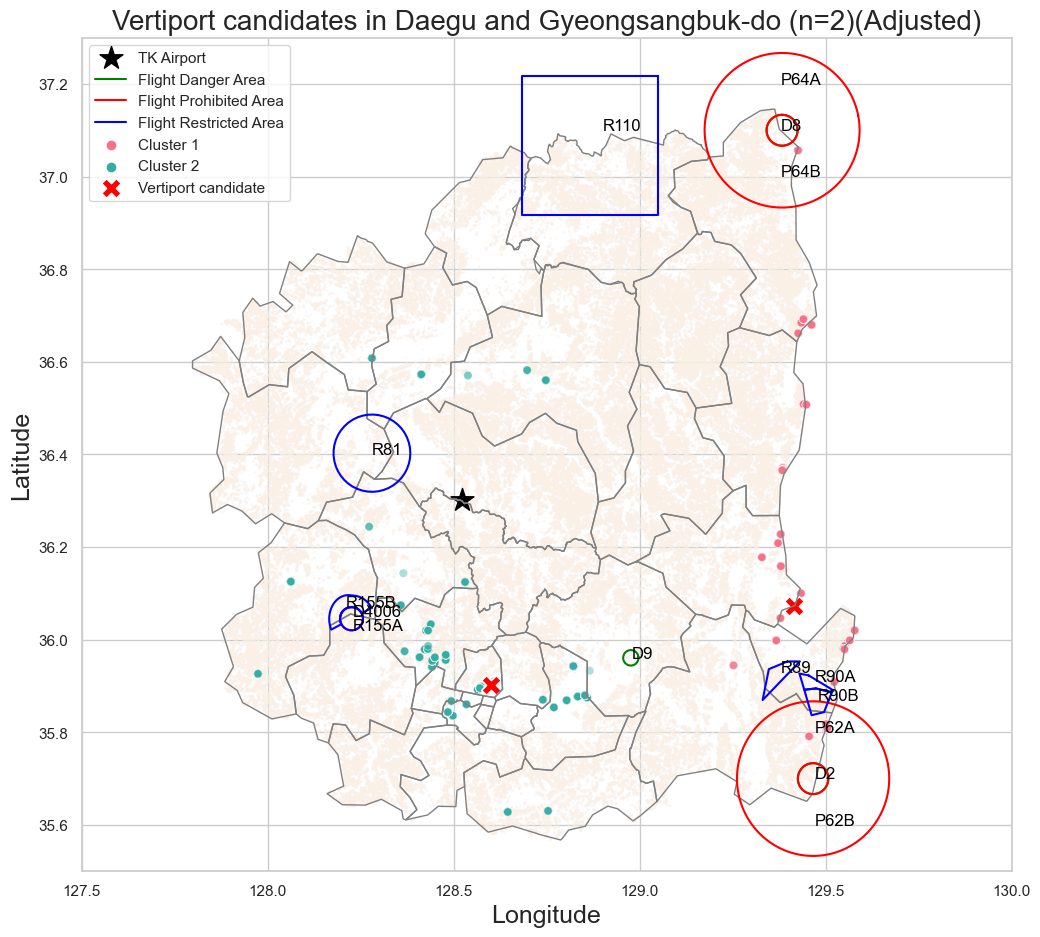

In [46]:
warehouse_df2_ad, centroids_df2_ad = data.Kmeans(2, danger, prohibited, restricted, slope = True , save=True, adjust = True)

In [47]:
data.folium_visualize(centroids_df2_ad, prh_rev, restricted_rev, danger_rev)

In [36]:
centroids_df2_ad

lon        lat  cluster
0  129.414746  36.073704      0.0
1  128.601830  35.901375      1.0